In [6]:
# 步骤一：导入包,加载数据
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, y_train = x_train / 255.0, x_test / 255.0
# 加载 MNIST 数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 正确归一化训练集和测试集
x_train, x_test = x_train / 255.0, x_test / 255.0


In [7]:
# 构建顺序网络模型
model = tf.keras.models.Sequential()

# 使用Input层显式定义输入形状，并使用Flatten()函数将数据平展为一维数组
model.add(tf.keras.layers.Input(shape=(28, 28)))
model.add(tf.keras.layers.Flatten())

# 为网络模型添加隐藏层和输出层
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 输出模型结构
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 步骤三，编译、训练和评估顺序网络模型
# 编译网络模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# 训练网络模型
model.fit(x_train, y_train, batch_size=32, epochs=5)

# 评估网络模型
model.evaluate(x_test, y_test, batch_size=32, verbose=2)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4504 - sparse_categorical_accuracy: 0.8708
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1256 - sparse_categorical_accuracy: 0.9628
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0816 - sparse_categorical_accuracy: 0.9754
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0552 - sparse_categorical_accuracy: 0.9829
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0433 - sparse_categorical_accuracy: 0.9868
313/313 - 0s - 1ms/step - loss: 0.0763 - sparse_categorical_accuracy: 0.9771


[0.07626388221979141, 0.9771000146865845]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


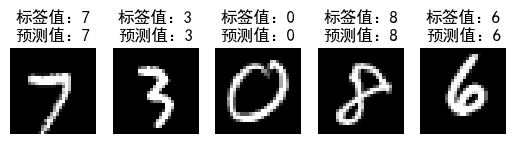

In [11]:
# 步骤四，应用顺序网络模型
# 应用顺序网络模型
for i in range(5):
    # 生成随机整数 t
    t = np.random.randint(1, 10000)
    
    # 选择测试集中的第 t 个样本，并重塑为 (1, 28, 28)
    x = tf.reshape(x_test[t], (1, 28, 28))

    # 应用模型进行预测
    y_pred = np.argmax(model.predict(x), axis=1)

    # 创建子图
    plt.subplot(1, 5, i + 1)

    # 设置字体为 SimHei 以显示中文
    plt.rcParams['font.sans-serif'] = ['SimHei']

    # 设置不显示坐标轴
    plt.axis('off')

    # 显示图片（灰度图）
    plt.imshow(x_test[t], cmap='gray')

    # 设置子图标题为实际标签和预测值
    title = "标签值：" + str(y_test[t]) + "\n预测值：" + str(y_pred[0])
    plt.title(title)

# 显示图形
plt.show()
